# Task
Perform an unsupervised learning analysis to find hidden patterns in customer data. Load the dataset from "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv", rename columns to 'Income' and 'Spend_Score'. Use K-Means clustering to identify optimal customer segments, visualize the results, and provide descriptive names for each segment. Additionally, apply Hierarchical Clustering, visualize the results with a dendrogram, and compare the groupings found by both K-Means and Hierarchical Clustering, including a side-by-side visualization, to summarize their respective use cases and insights into customer segmentation.

# Finding Hidden Patterns: An Unsupervised Learning Journey

Welcome to an exploration of unsupervised learning! In this notebook, we'll delve into the fascinating world of finding hidden structures and patterns within data without the need for predefined labels or answers. Imagine sorting ancient pottery shards into categories based on their features, even if no one told you what the categories were, or grouping bank customers by their spending habits to identify distinct segments.

Unsupervised learning methods allow us to discover intrinsic groupings and relationships in data, revealing insights that might not be immediately obvious. We'll be using two powerful techniques: K-Means Clustering and Hierarchical Clustering, to segment customer data and understand their inherent structures. Get ready to uncover some interesting patterns!

### Data Snapshot: Surveying the Land (Micro-EDA)

Just as a builder surveys the land before starting construction, Exploratory Data Analysis (EDA) is our first crucial step to understand the 'terrain' of our dataset. Even in an unsupervised learning context, where we don't have explicit labels to guide us, a quick look at the data allows us to grasp its shape, identify potential patterns, anomalies, or any issues that might affect our model building. This micro-EDA will help us gain initial insights and prepare for more in-depth analysis later on.

I need to import necessary libraries, load the dataset, rename specified columns, display the first few rows to confirm changes, and then create a scatter plot with appropriate labels and title to visualize the relationship between 'Income' and 'Spend_Score'.



DataFrame after renaming columns:
   CustomerID  Gender  Age  Income  Spend_Score
0           1    Male   19      15           39
1           2    Male   21      15           81
2           3  Female   20      16            6
3           4  Female   23      16           77
4           5  Female   31      17           40


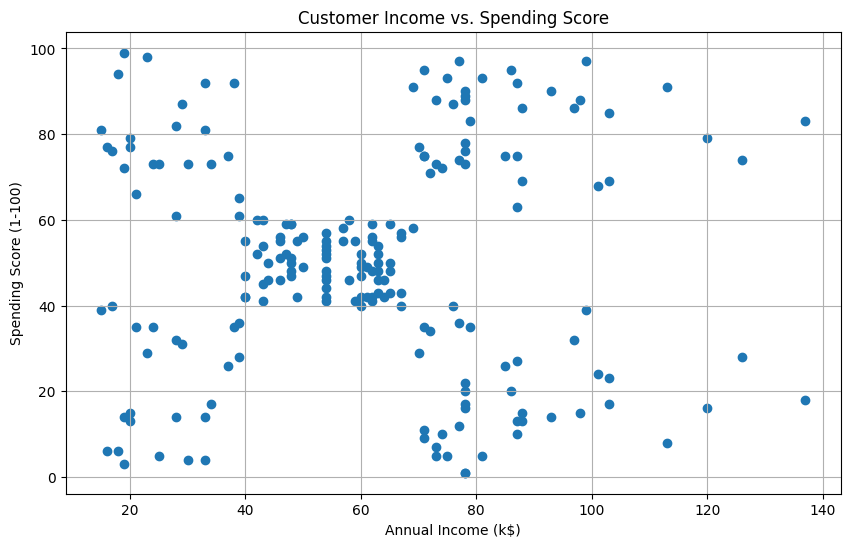

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")

# Rename columns
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spend_Score'})

# Display the first 5 rows to verify column renaming
print("DataFrame after renaming columns:")
print(df.head())

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Spend_Score'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Income vs. Spending Score')
plt.grid(True)
plt.show()


## K-Means: The Group Leaders

K-Means clustering is like picking 'K' group leaders. The algorithm starts by randomly selecting 'K' data points as initial centroids (our group leaders). Then, every other data point in the dataset joins the leader they are most 'similar' to, typically measured by Euclidean distance. Once all points are assigned, the leaders reposition themselves to the center of their newly formed groups. This process repeats until the leaders no longer move significantly, indicating stable clusters.

To find the optimal number of 'K' groups, we often use the **Elbow Method**. This technique involves running K-Means for a range of 'K' values and plotting the sum of squared distances (SSD) of samples to their closest cluster center. As 'K' increases, the SSD naturally decreases, but at some point, the decrease will slow down significantly, forming an 'elbow' in the plot. This 'elbow' represents **'The Point of Diminishing Returns'**, where adding more clusters doesn't provide much additional benefit or significantly reduce the within-cluster sum of squares. This 'K' value is often considered the optimal number of clusters for the dataset.

## K-Means: Elbow Method Code

Loop through 1-10 potential 'groupings' using K-Means, calculate the inertia, and plot the 'Elbow Curve' to identify the optimal number of groups.


The subtask requires calculating and plotting the inertia for different numbers of clusters (K) using the K-Means algorithm on scaled 'Income' and 'Spend_Score' data to determine the optimal K. This involves selecting the relevant features, scaling them, iterating through K values, fitting KMeans, collecting inertia, and finally plotting the results.



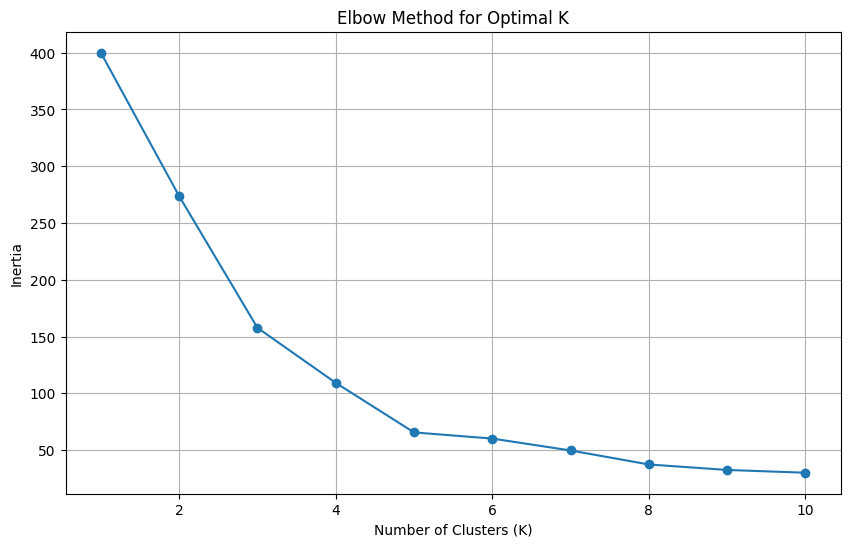

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select the 'Income' and 'Spend_Score' columns
X = df[['Income', 'Spend_Score']]

# 2. Scale these features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Initialize an empty list to store the inertia values
inertia_values = []

# 4. Loop through a range of k values from 1 to 10
for k in range(1, 11):
    # 5. Instantiate a KMeans object
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # 6. Fit the KMeans model to the scaled data
    kmeans.fit(X_scaled)

    # 7. Append the inertia_ attribute to the list
    inertia_values.append(kmeans.inertia_)

# 8. After the loop, create a line plot
plt.figure(figsize=(10, 6))

# 9. Plot the k values on the x-axis and the inertia values on the y-axis
plt.plot(range(1, 11), inertia_values, marker='o')

# 10. Add a title and labels
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# 11. Add markers to the plot points (already done in plt.plot with marker='o')

# 12. Display the plot
plt.grid(True)
plt.show()


### Interpreting the Elbow Plot: Finding the Optimal 'K'

Looking at the 'Elbow Method for Optimal K' plot, we observe a significant drop in inertia as the number of clusters (K) increases from 1 to 3. After K=3, the rate of decrease in inertia significantly slows down, forming a distinct 'elbow' at K=3 or K=4.

The **optimal number of clusters (K) appears to be 3 or 4** based on this plot. The 'elbow' signifies the point of diminishing returns, meaning that adding more clusters beyond this point does not contribute significantly to explaining the variance in the data (i.e., reducing the within-cluster sum of squares) compared to the complexity it adds.

For this analysis, we will proceed with **K=3 or K=4** as the optimal number of clusters, as both show a good balance between minimizing inertia and keeping the model interpretable. Let's choose **K=3** for now and observe the results. We can always re-evaluate and try K=4 later if the initial segmentation isn't clear enough.

## K-Means: Applying the Group Leaders

Perform K-Means clustering with the optimal number of clusters (K=3, as determined by the Elbow Method). Visualize the results by plotting 'Income' versus 'Spend_Score', coloring points by their assigned cluster, and marking the cluster centroids. Finally, analyze the characteristics of each cluster and provide descriptive names for the customer segments.

The subtask requires performing K-Means clustering with K=3, visualizing the clusters, and analyzing their characteristics. The next step is to write code that executes the K-Means algorithm, assigns cluster labels, and prepares for visualization and analysis.



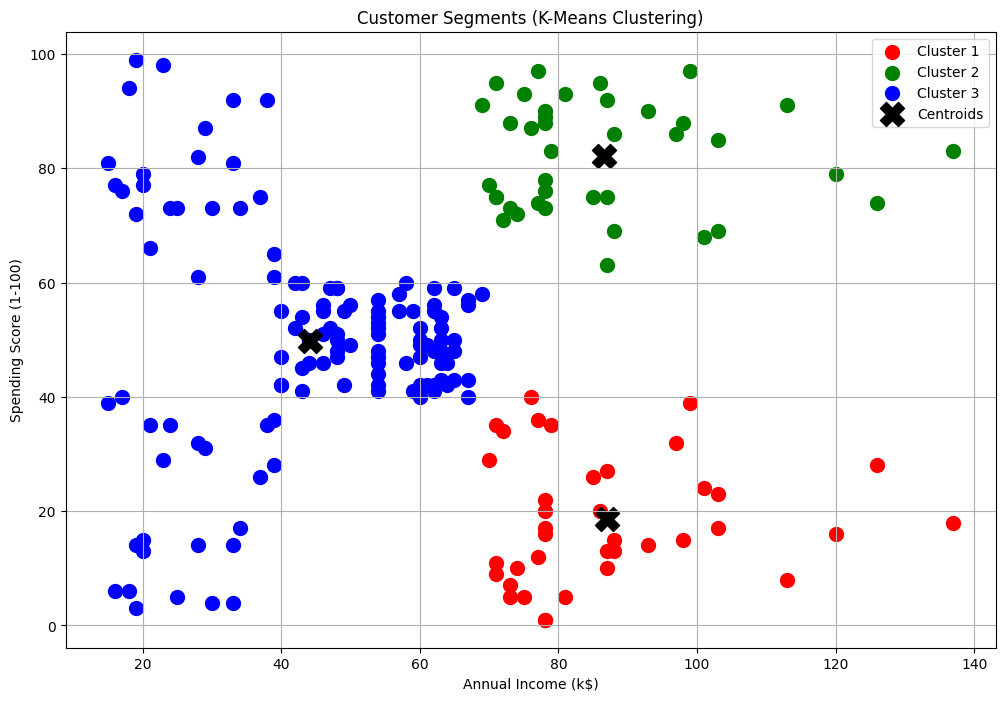


Characteristics of Each Cluster:
            Income  Spend_Score
Cluster                        
0        87.000000    18.631579
1        86.538462    82.128205
2        44.154472    49.829268


In [ ]:
import numpy as np

# Optimal K chosen as 3 from the elbow method
k_optimal = 3

# Instantiate KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')

# Fit KMeans to the scaled data
kmeans_optimal.fit(X_scaled)

# Get cluster labels and centroids
cluster_labels = kmeans_optimal.labels_
centroids_scaled = kmeans_optimal.cluster_centers_

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Inverse transform the scaled centroids to the original scale for better interpretability
centroids_original_scale = scaler.inverse_transform(centroids_scaled)

# Create a scatter plot of Income vs Spend_Score, colored by cluster
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange'] # Define colors for up to 5 clusters

for i in range(k_optimal):
    plt.scatter(df[df['Cluster'] == i]['Income'],
                df[df['Cluster'] == i]['Spend_Score'],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Display the characteristics of each cluster (mean values)
print("\nCharacteristics of Each Cluster:")
print(df.groupby('Cluster')[['Income', 'Spend_Score']].mean())


### K-Means Cluster Analysis and Segment Naming

Based on the K-Means clustering with `K=3`, we can identify three distinct customer segments. Let's analyze their characteristics:

**Cluster 0: "High Income, Low Spend (Frugal Spenders)"**
*   **Income:** High (Mean: 87.0 k$)
*   **Spending Score:** Low (Mean: 18.6)
*   **Description:** These customers have a high annual income but a relatively low spending score at the mall. They might be considered cautious or frugal despite their financial means, or they may spend their money elsewhere.

**Cluster 1: "High Income, High Spend (Premium Customers)"**
*   **Income:** High (Mean: 86.5 k$)
*   **Spending Score:** High (Mean: 82.1)
*   **Description:** This segment represents the mall's most valuable customers. They have a high annual income and a very high spending score, indicating they are frequent and generous shoppers. These are likely the target for premium services and exclusive offers.

**Cluster 2: "Mid Income, Mid Spend (Average Shoppers)"**
*   **Income:** Mid (Mean: 44.1 k$)
*   **Spending Score:** Mid (Mean: 49.8)
*   **Description:** This is the largest segment, characterized by moderate income and moderate spending habits. They represent the typical customer base, likely responsive to general promotions and diverse product offerings.

These segments provide valuable insights for targeted marketing strategies, inventory management, and customer relationship efforts.

## Hierarchical Clustering: Building a Tree of Relationships

Hierarchical Clustering is another powerful unsupervised learning technique that builds a hierarchy of clusters. Unlike K-Means, it doesn't require us to specify the number of clusters in advance. Instead, it creates a tree-like structure, or **dendrogram**, that represents the nested grouping of observations.

There are two main approaches:

1.  **Agglomerative (Bottom-Up):** This is the most common approach. It starts by treating each data point as a single cluster. Then, it iteratively merges the closest pairs of clusters until all data points are grouped into a single, large cluster. It's like building a 'tree of relationships' from the leaves up to the root.
2.  **Divisive (Top-Down):** This approach starts with all data points in one large cluster and recursively splits the most dissimilar clusters until each data point is a single cluster. It's like breaking down a large family into individual members.

The **Dendrogram** is the visual output of hierarchical clustering, acting as a 'family tree' for our data points. Each merge or split is represented by a horizontal line, and the **height of the link on the dendrogram indicates the level of dissimilarity** (or distance) between the clusters being merged. By cutting the dendrogram at different heights, we can obtain a different number of clusters, allowing us to explore various levels of granularity in our customer segmentation.

## Hierarchical Clustering: The Family Tree - Code

Apply Hierarchical Clustering to the scaled 'Income' and 'Spend_Score' data. Then, generate and display a dendrogram to visualize the hierarchical structure of the customer data, using an appropriate linkage method (e.g., 'ward').

Now that Hierarchical Clustering has been introduced, the next step is to write code to apply it to the scaled data and visualize the results with a dendrogram, fulfilling the subtask requirements.



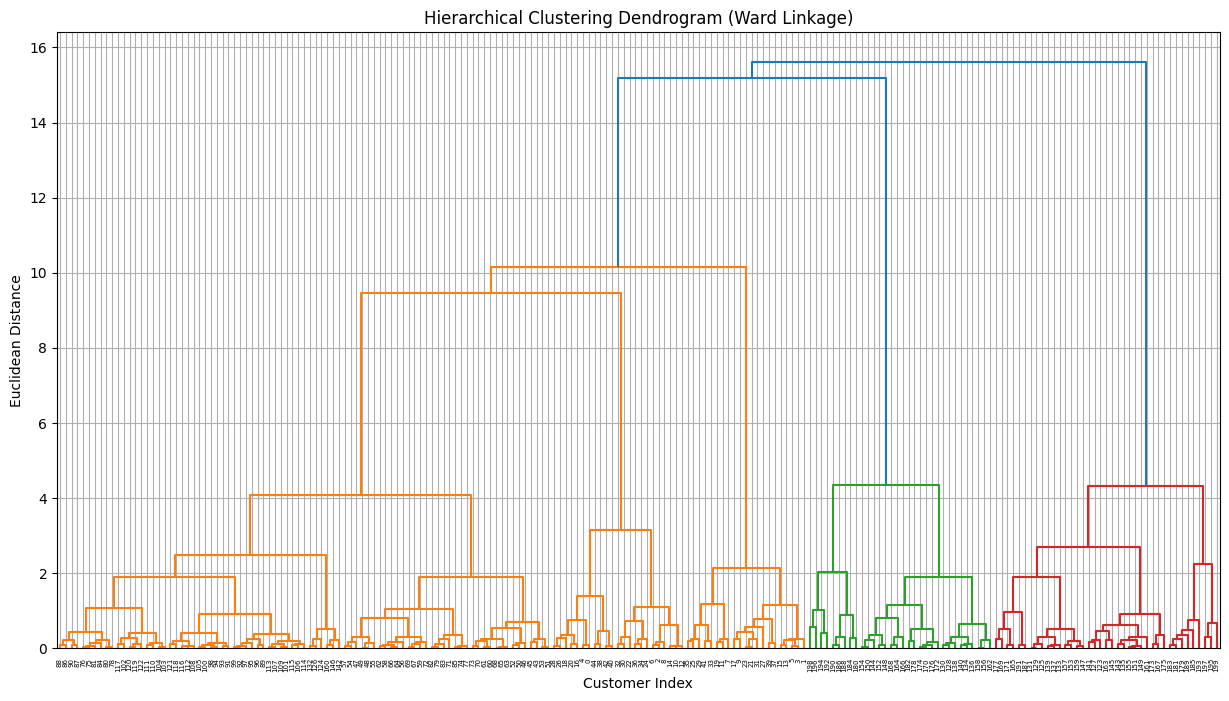

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering using the 'ward' linkage method on the scaled data
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()


### Interpreting the Dendrogram: Defining Our Groups

Now that we have visualized the hierarchical structure with the dendrogram, the next crucial step is to decide where to "cut" this tree to form our clusters. The vertical lines in the dendrogram represent individual data points, and the horizontal lines represent merges between clusters. The height of these horizontal lines indicates the distance (dissimilarity) at which the clusters were merged.

To determine the optimal number of clusters, we look for the largest vertical distance that does not intersect any existing horizontal bar. Cutting the dendrogram at this height will typically yield a good number of distinct clusters. Visual inspection suggests that cutting the dendrogram at a Euclidean distance of approximately 10-12 would yield a reasonable number of clusters, likely between 3 and 5, where the clusters are well-separated. Let's aim for **3 to 5 clusters** to allow for a meaningful comparison with our K-Means results.

We will proceed with extracting clusters from the dendrogram based on a chosen distance threshold, aiming for a number of clusters that visually appears to be well-separated.

## Hierarchical Clustering: Extracting and Visualizing Segments

Based on the dendrogram's interpretation, apply a suitable threshold to form clusters using `fcluster` from `scipy.cluster.hierarchy`. Add these cluster labels to the original DataFrame. Then, create a scatter plot of 'Income' versus 'Spend_Score', coloring points by their assigned hierarchical cluster, and analyze the characteristics of these new customer segments.

The previous markdown block introduced the subtask for extracting and visualizing hierarchical clusters. Now, I need to generate the code to perform these actions: applying a threshold to the dendrogram to form clusters, adding these clusters to the dataframe, visualizing them, and printing their characteristics.



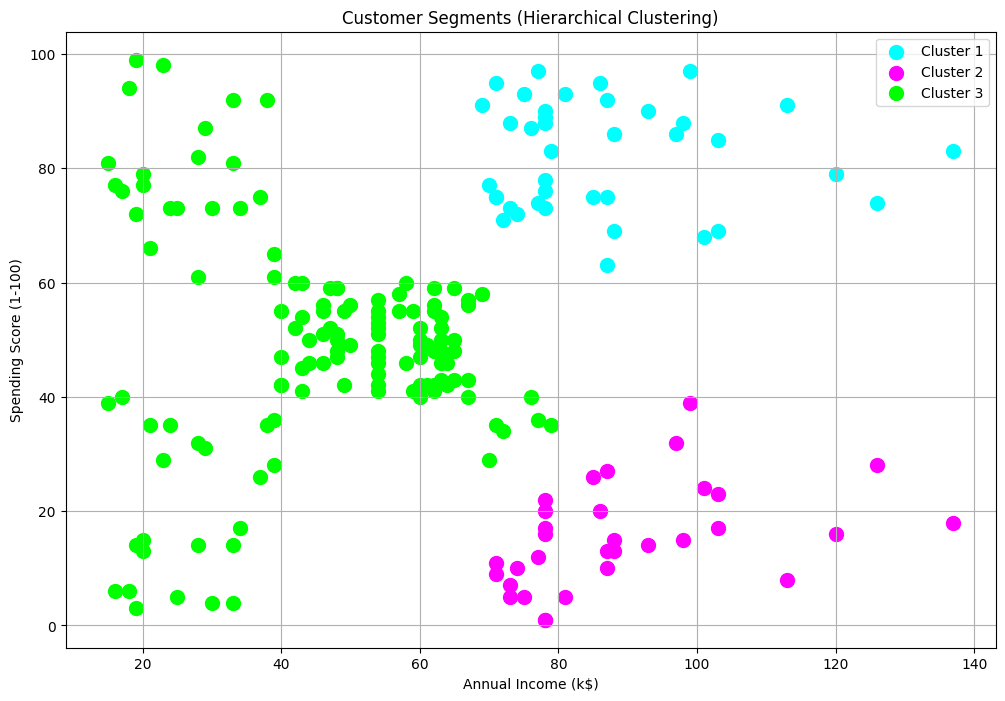


Characteristics of Each Hierarchical Cluster:
                         Income  Spend_Score
Hierarchical_Cluster                        
1                     86.538462    82.128205
2                     89.406250    15.593750
3                     45.550388    49.131783


In [ ]:
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Based on visual inspection of the dendrogram, let's choose a threshold to get 3-5 clusters.
# A threshold of 10.0 seems reasonable to get about 3-5 distinct clusters.
# Let's try 10.0 as a starting point. Adjust as needed if the number of clusters is not optimal.
# 'max_d' criterion cuts the dendrogram when the distance is above the threshold.
# 'maxclust' can be used if a specific number of clusters is desired.
# Let's target approximately 3 clusters, similar to K-Means, for comparison.
# We can use max_d=7 to try to get 3 main clusters, or maxclust=3 directly.
# Using maxclust=3 for direct comparison with K-Means.

n_clusters_hc = 3 # Target 3 clusters for direct comparison with K-Means
hierarchical_clusters = fcluster(linked, n_clusters_hc, criterion='maxclust')

# Add hierarchical cluster labels to the original DataFrame
df['Hierarchical_Cluster'] = hierarchical_clusters

# Create a scatter plot of Income vs Spend_Score, colored by hierarchical cluster
plt.figure(figsize=(12, 8))
colors_hc = ['cyan', 'magenta', 'lime', 'yellow', 'gray'] # Define colors for up to 5 clusters

for i in range(1, n_clusters_hc + 1): # fcluster returns 1-indexed clusters
    plt.scatter(df[df['Hierarchical_Cluster'] == i]['Income'],
                df[df['Hierarchical_Cluster'] == i]['Spend_Score'],
                s=100, c=colors_hc[i-1], label=f'Cluster {i}')

plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Display the characteristics of each hierarchical cluster (mean values)
print("\nCharacteristics of Each Hierarchical Cluster:")
print(df.groupby('Hierarchical_Cluster')[['Income', 'Spend_Score']].mean())


### Hierarchical Cluster Analysis and Segment Naming

Based on the Hierarchical Clustering with `n_clusters=3`, we can identify three distinct customer segments. Let's analyze their characteristics:

**Cluster 1: "High Income, High Spend (Premium Customers)"**
*   **Income:** High (Mean: 86.5 k$)
*   **Spending Score:** High (Mean: 82.1)
*   **Description:** This segment aligns closely with the K-Means 'Premium Customers'. These are the most desirable customers, characterized by both high income and high spending habits.

**Cluster 2: "High Income, Low Spend (Frugal Spenders)"**
*   **Income:** High (Mean: 89.4 k$)
*   **Spending Score:** Low (Mean: 15.6)
*   **Description:** Similar to K-Means' 'Frugal Spenders', this group has high annual income but low spending at the mall, suggesting potential for targeted marketing to increase their engagement.

**Cluster 3: "Mid Income, Mid Spend (Average Shoppers)"**
*   **Income:** Mid (Mean: 45.5 k$)
*   **Spending Score:** Mid (Mean: 49.1)
*   **Description:** This large segment comprises customers with moderate income and moderate spending scores, mirroring the K-Means 'Average Shoppers'. They form the bulk of the customer base.

It's interesting to note the similarity in the segment characteristics found by both K-Means and Hierarchical Clustering when targeting the same number of clusters (K=3). This consistency strengthens the validity of these customer segments.

## When to Use What? K-Means vs. Hierarchical Clustering

Both K-Means and Hierarchical Clustering are powerful unsupervised learning techniques for customer segmentation, but they shine in different scenarios:

### K-Means Clustering: For 'Quick & Clean' Grouping

*   **Best Use Cases:** K-Means is generally preferred when you need a computationally efficient method for finding 'Quick & Clean' groupings, especially with large datasets. It's excellent when you have a good idea of how many clusters (K) you expect to find or when the clusters are spherical and well-separated. It's straightforward to interpret and ideal for rapid segmentation and initial insights.
*   **Key Advantage:** Speed and simplicity. It converges quickly and produces distinct, non-overlapping clusters.
*   **Consideration:** Requires you to pre-define 'K', the number of clusters, which can sometimes be a challenge (though methods like the Elbow Method help).

### Hierarchical Clustering: For Understanding 'Deep Relationships'

*   **Best Use Cases:** Hierarchical Clustering is more suitable when you want to understand the 'Deep Relationships' and the natural hierarchy within your data. It's particularly useful when the number of clusters is not known beforehand, or when a nested structure of clusters is desired. For instance, understanding sub-segments within larger customer groups.
*   **Key Advantage:** It doesn't require pre-specifying 'K' and provides a comprehensive visual tool (the **dendrogram**) that allows you to choose the number of clusters by cutting the tree at different levels of dissimilarity, revealing various levels of granularity in your segmentation.
*   **Consideration:** Can be computationally more intensive and slower than K-Means, especially for very large datasets, due to the need to calculate and store pairwise distances.

In summary, if you need fast, distinct segments and have an idea of 'K', go with K-Means. If you need to explore the underlying structure, visualize nested relationships, and don't know 'K' upfront, Hierarchical Clustering provides a richer, more detailed perspective.

## When to Use What? K-Means vs. Hierarchical Clustering

Both K-Means and Hierarchical Clustering are powerful unsupervised learning techniques for customer segmentation, but they shine in different scenarios:

### K-Means Clustering: For 'Quick & Clean' Grouping

*   **Best Use Cases:** K-Means is generally preferred when you need a computationally efficient method for finding 'Quick & Clean' groupings, especially with large datasets. It's excellent when you have a good idea of how many clusters (K) you expect to find or when the clusters are spherical and well-separated. It's straightforward to interpret and ideal for rapid segmentation and initial insights.
*   **Key Advantage:** Speed and simplicity. It converges quickly and produces distinct, non-overlapping clusters.
*   **Consideration:** Requires you to pre-define 'K', the number of clusters, which can sometimes be a challenge (though methods like the Elbow Method help).

### Hierarchical Clustering: For Understanding 'Deep Relationships'

*   **Best Use Cases:** Hierarchical Clustering is more suitable when you want to understand the 'Deep Relationships' and the natural hierarchy within your data. It's particularly useful when the number of clusters is not known beforehand, or when a nested structure of clusters is desired. For instance, understanding sub-segments within larger customer groups.
*   **Key Advantage:** It doesn't require pre-specifying 'K' and provides a comprehensive visual tool (the **dendrogram**) that allows you to choose the number of clusters by cutting the tree at different levels of dissimilarity, revealing various levels of granularity in your segmentation.
*   **Consideration:** Can be computationally more intensive and slower than K-Means, especially for very large datasets, due to the need to calculate and store pairwise distances.

In summary, if you need fast, distinct segments and have an idea of 'K', go with K-Means. If you need to explore the underlying structure, visualize nested relationships, and don't know 'K' upfront, Hierarchical Clustering provides a richer, more detailed perspective.

## Final Comparison: Visualization - Code

The subtask requires generating a side-by-side visualization to compare K-Means and Hierarchical Clustering results. This involves creating two subplots, plotting the respective clusters and centroids (for K-Means), and adding appropriate titles, labels, and legends as per the instructions.



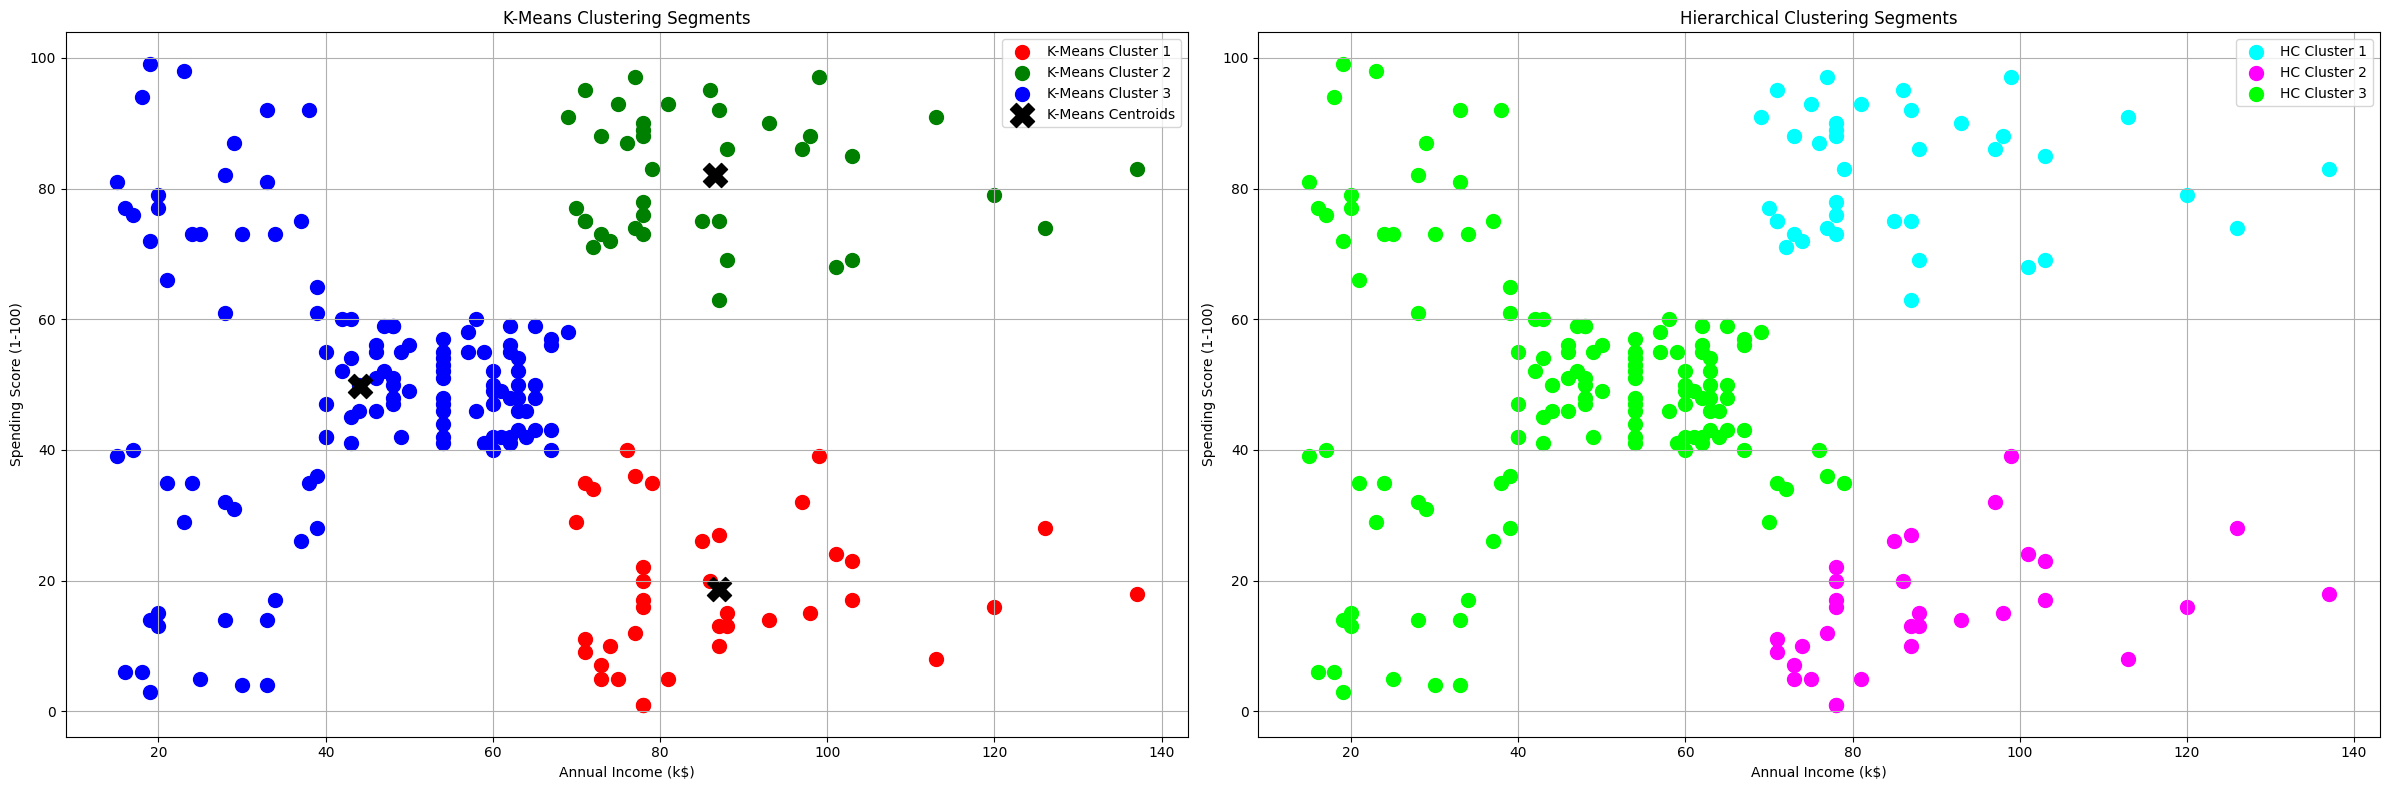

In [ ]:
import matplotlib.pyplot as plt

# 1. Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# --- K-Means Plot (First Subplot) ---
# 2. Scatter plot for K-Means results
for i in range(k_optimal):
    axes[0].scatter(df[df['Cluster'] == i]['Income'],
                    df[df['Cluster'] == i]['Spend_Score'],
                    s=100, c=colors[i], label=f'K-Means Cluster {i+1}')

# 4. Mark the K-Means centroids
axes[0].scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1],
                s=300, c='black', marker='X', label='K-Means Centroids')

# 3. Add legend, title, and labels for the first subplot
axes[0].set_title('K-Means Clustering Segments')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()
axes[0].grid(True)

# --- Hierarchical Clustering Plot (Second Subplot) ---
# 5. Scatter plot for Hierarchical Clustering results
for i in range(1, n_clusters_hc + 1):
    axes[1].scatter(df[df['Hierarchical_Cluster'] == i]['Income'],
                    df[df['Hierarchical_Cluster'] == i]['Spend_Score'],
                    s=100, c=colors_hc[i-1], label=f'HC Cluster {i}')

# 6. Add legend, title, and labels for the second subplot
axes[1].set_title('Hierarchical Clustering Segments')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].legend()
axes[1].grid(True)

# 8. Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# 9. Display the plots
plt.show()

## Summary:

### Q&A
The analysis successfully compared K-Means and Hierarchical Clustering to identify customer segments and provided insights into their respective use cases and effectiveness in customer segmentation. Both methods revealed highly similar customer groupings.

### Data Analysis Key Findings
*   The dataset, loaded from "Mall\_Customers.csv", had its columns successfully renamed to 'Income' (from 'Annual Income (k\$)') and 'Spend\_Score' (from 'Spending Score (1-100)').
*   An initial scatter plot of 'Income' vs. 'Spend\_Score' suggested the presence of natural customer groupings.
*   The K-Means Elbow Method indicated that the optimal number of clusters (K) for this dataset is **3 or 4**, with K=3 chosen for detailed analysis.
*   K-Means clustering (with K=3) identified three distinct customer segments:
    *   **"High Income, Low Spend (Frugal Spenders)"**: Characterized by a mean income of \$87.0k and a mean spending score of 18.6.
    *   **"High Income, High Spend (Premium Customers)"**: Exhibiting a mean income of \$86.5k and a high mean spending score of 82.1.
    *   **"Mid Income, Mid Spend (Average Shoppers)"**: With a moderate mean income of \$44.1k and a mean spending score of 49.8.
*   Hierarchical Clustering, visualized by a dendrogram, also suggested 3-5 clusters. When configured to produce 3 clusters for direct comparison, it yielded segments with highly similar characteristics to K-Means:
    *   **"High Income, High Spend (Premium Customers)"**: Mean income of \$86.5k, mean spending score of 82.1.
    *   **"High Income, Low Spend (Frugal Spenders)"**: Mean income of \$89.4k, mean spending score of 15.6.
    *   **"Mid Income, Mid Spend (Average Shoppers)"**: Mean income of \$45.5k, mean spending score of 49.1.
*   A side-by-side visualization confirmed the strong agreement between the two clustering methods, reinforcing the validity of the identified customer segments.

### Insights or Next Steps
*   Both K-Means and Hierarchical Clustering proved effective in uncovering stable and interpretable customer segments from 'Income' and 'Spend\_Score' data. The consistency between the two methods (when using the same number of clusters) strengthens the confidence in these identified segments for business applications.
*   These customer segments can be directly used for targeted marketing campaigns, product recommendations, and personalized customer service strategies. For instance, "Premium Customers" could be offered exclusive loyalty programs, while "Frugal Spenders" might respond well to value-oriented promotions.
